In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Compile_Label_Data.xlsx')

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['Lemma'], df['Label'], test_size=0.2, random_state=42)

In [5]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
gbm = GradientBoostingClassifier(learning_rate= 1, max_depth= 2, n_estimators= 400)
gbm.fit(X_train_vec, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=400)

In [7]:
y_pred = gbm.predict(X_test_vec)

In [8]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print("AUC-ROC score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.51      0.51     11598
           1       0.59      0.60      0.60     13886

    accuracy                           0.56     25484
   macro avg       0.56      0.56      0.56     25484
weighted avg       0.56      0.56      0.56     25484

AUC-ROC score: 0.5551338247936534


In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
cm = confusion_matrix(y_test,y_pred)

In [11]:
labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

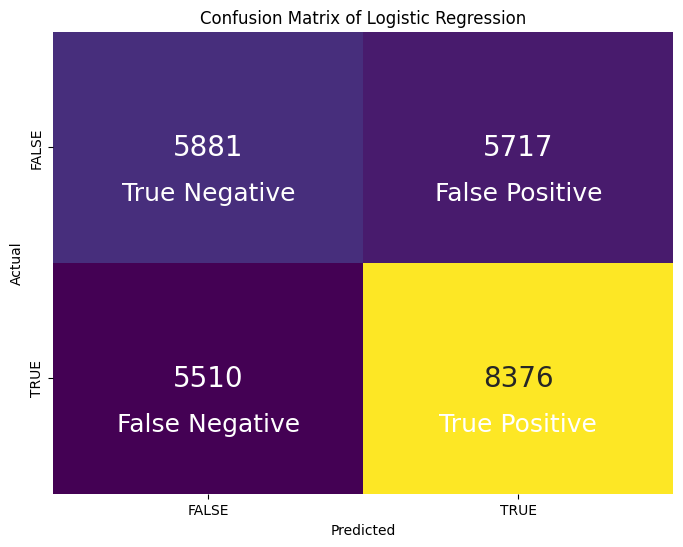

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="viridis", fmt="d", cbar=False,
            xticklabels=['FALSE', 'TRUE'],
            yticklabels=['FALSE', 'TRUE'],annot_kws={"size": 20})
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, labels[i][j], ha='center', va='center', fontsize=18, color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [14]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
scores = cross_val_score(gbm,X_train_vec,y_train, cv=kfold, scoring='accuracy')

In [16]:
average_accuracy = scores.mean()
average_accuracy

0.5644129136330698

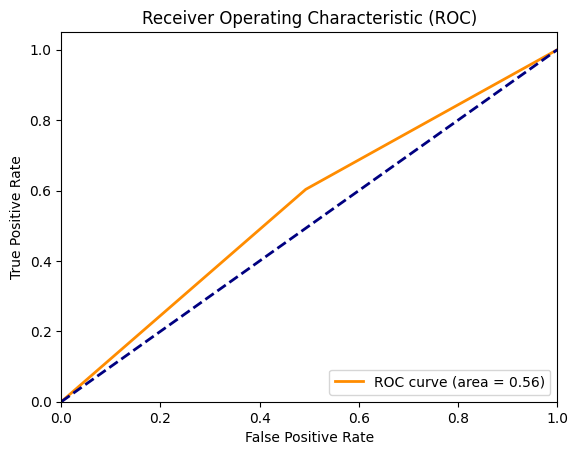

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


probas = gbm.predict(X_test_vec)


fpr, tpr, thresholds = roc_curve(y_test, probas)


roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

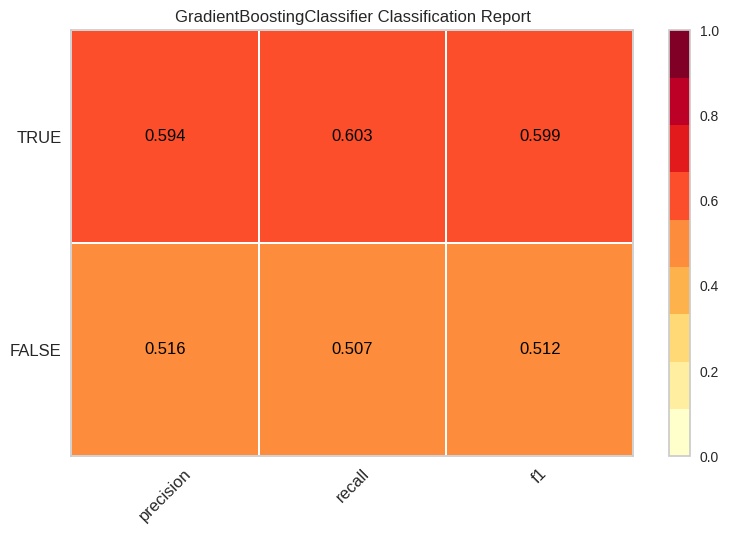

<Axes: title={'center': 'GradientBoostingClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(gbm, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train_vec, y_train)
visualizer.score(X_test_vec, y_test)
visualizer.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
import numpy as np
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    gbm, cv=cv, scoring='f1_weighted', n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train_vec, y_train)
lc_viz.show()